In [1]:
from IPython.core.interactiveshell import InteractiveShell

London House Price Predictions

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_rows', 326)

Read the Data

In [3]:
#housing = pd.read_csv("London_House_Prices_1995-2021.csv")
housing = pd.read_excel("London House Prices 1995-2021.xlsx", index_col=0, parse_dates=True)

In [4]:
housing.shape
housing.head(len(housing.index))

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
1995-01-01,91448.98487,50460.22660,93284.51832,64958.09036,71306.56698,81671.47692,120932.88810,69158.16225,79885.89069,72514.69096,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.59610,74435.76052,64018.87894,54705.15790,53202.77128
1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.86220,68951.09542,80897.06551,73155.19746,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.15490
1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.21310,68712.44341,81379.86288,72190.44144,...,42369.72984,44434.86810,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.28430
1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.89900,68610.04641,82188.90498,71442.92235,...,42095.84360,44267.77960,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.85480
1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.27820,68844.91690,82077.05525,70630.77955,...,43266.45165,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,53678.24041
1995-06-01,94900.51244,53700.34831,90107.23471,64252.32335,74310.48167,82382.83435,121887.46250,69052.51103,81630.66181,71348.31147,...,42315.34372,44112.96432,45392.63981,45679.99539,50100.43023,56288.94557,75606.24501,65511.00800,54420.15939,53735.15475
1995-07-01,110128.04230,52113.12157,91441.24768,63722.70055,74127.03788,82898.52264,124027.57680,69142.48112,82352.22260,71837.54011,...,43287.74323,44109.58764,45534.99864,46037.67312,49860.00809,57242.30186,75984.24079,65224.88465,54265.86368,53900.60633
1995-08-01,112329.43760,52232.19868,92361.31512,64432.60005,73547.04110,82054.37156,125529.80390,68993.42545,82706.65927,72237.94562,...,41899.05494,44193.66583,45111.45939,45922.53585,49598.45969,56732.40547,75529.34488,64851.60429,54365.71495,53600.31975
1995-09-01,104473.10960,51471.61353,93273.12245,64509.54767,73789.54287,81440.43008,120596.85110,69393.50023,82011.08271,71725.22104,...,41850.85646,44088.07696,44837.86023,45771.66321,49319.69715,56259.28635,74940.80872,64352.47119,54243.98694,53309.23310
1995-10-01,108038.11810,51513.75760,92567.38498,64529.93725,73264.05385,81862.16087,117458.49220,68934.61234,80522.66054,72349.13744,...,41688.16474,43109.99448,44309.99910,45154.71999,49597.93617,55240.28898,74302.08030,64125.80591,54264.60640,52844.62070


In [5]:
print(housing.dtypes)

City of London          float64
Barking & Dagenham      float64
Barnet                  float64
Bexley                  float64
Brent                   float64
Bromley                 float64
Camden                  float64
Croydon                 float64
Ealing                  float64
Enfield                 float64
Greenwich               float64
Hackney                 float64
Hammersmith & Fulham    float64
Haringey                float64
Harrow                  float64
Havering                float64
Hillingdon              float64
Hounslow                float64
Islington               float64
Kensington & Chelsea    float64
Kingston upon Thames    float64
Lambeth                 float64
Lewisham                float64
Merton                  float64
Newham                  float64
Redbridge               float64
Richmond upon Thames    float64
Southwark               float64
Sutton                  float64
Tower Hamlets           float64
Waltham Forest          float64
Wandswor

In [6]:
#fig = plt.figure()
#scatter_matrix(housing, figsize = (25,25), alpha = 0.9, diagonal = "kde", marker = "o")

array([[<AxesSubplot:title={'center':'City of London'}>,
        <AxesSubplot:title={'center':'Barking & Dagenham'}>,
        <AxesSubplot:title={'center':'Barnet'}>,
        <AxesSubplot:title={'center':'Bexley'}>,
        <AxesSubplot:title={'center':'Brent'}>,
        <AxesSubplot:title={'center':'Bromley'}>,
        <AxesSubplot:title={'center':'Camden'}>],
       [<AxesSubplot:title={'center':'Croydon'}>,
        <AxesSubplot:title={'center':'Ealing'}>,
        <AxesSubplot:title={'center':'Enfield'}>,
        <AxesSubplot:title={'center':'Greenwich'}>,
        <AxesSubplot:title={'center':'Hackney'}>,
        <AxesSubplot:title={'center':'Hammersmith & Fulham'}>,
        <AxesSubplot:title={'center':'Haringey'}>],
       [<AxesSubplot:title={'center':'Harrow'}>,
        <AxesSubplot:title={'center':'Havering'}>,
        <AxesSubplot:title={'center':'Hillingdon'}>,
        <AxesSubplot:title={'center':'Hounslow'}>,
        <AxesSubplot:title={'center':'Islington'}>,
        <AxesS

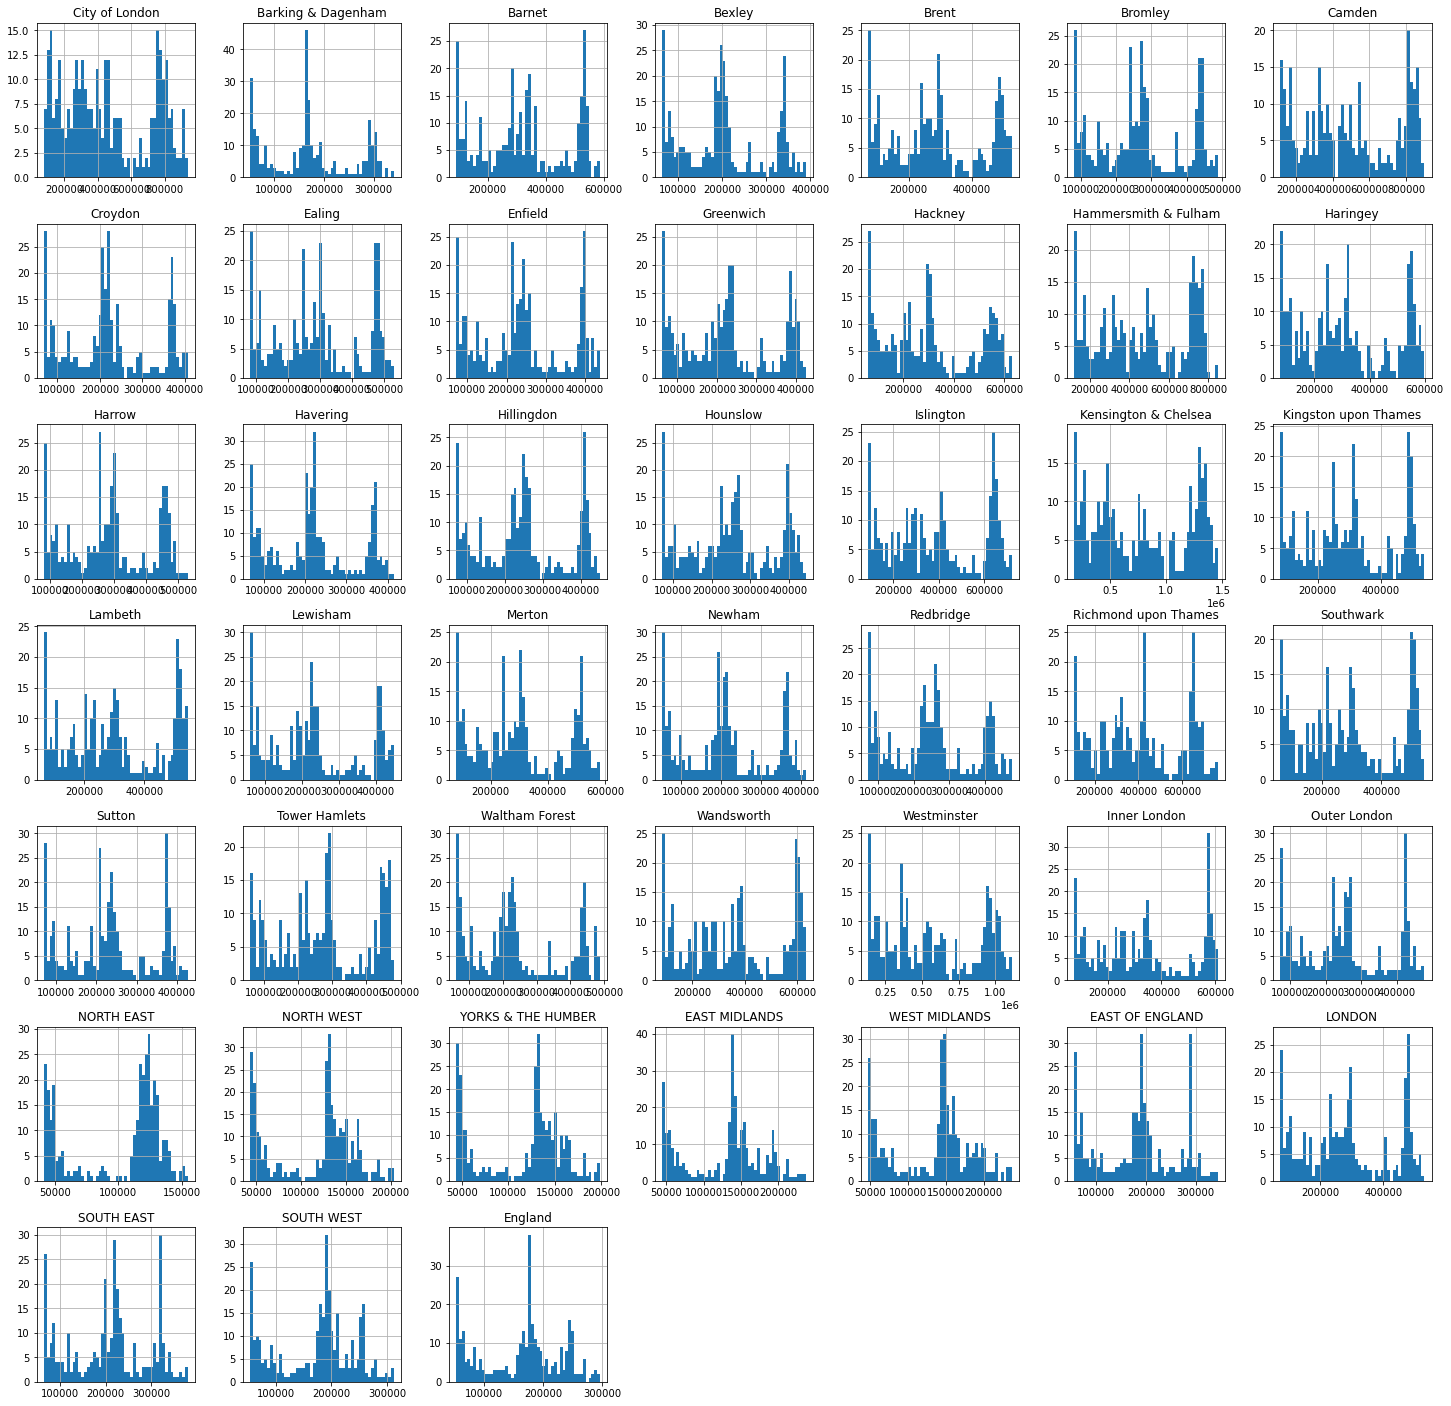

In [7]:
housing.hist(figsize=(25,25), bins=50)

In [8]:
#Correlation Matrix
hcorr = housing.corr()
hcorr.style.background_gradient()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
City of London,1.000000,0.948337,0.979514,0.961106,0.980361,0.973641,0.984328,0.963700,0.981176,0.969355,0.975509,0.982689,0.978771,0.982420,0.971119,0.956309,0.970519,0.971233,0.985738,0.978562,0.980405,0.985970,0.978132,0.981615,0.961251,0.961226,0.985088,0.986602,0.969565,0.977363,0.969650,0.985713,0.984403,0.987314,0.973958,0.794727,0.871173,0.874154,0.900953,0.896458,0.947089,0.981319,0.952189,0.914403,0.933362
Barking & Dagenham,0.948337,1.000000,0.983774,0.997642,0.982089,0.990999,0.953476,0.996757,0.982216,0.994098,0.991440,0.976896,0.939084,0.981495,0.989257,0.998298,0.993180,0.986900,0.962236,0.926142,0.983498,0.974595,0.988716,0.983959,0.997741,0.995556,0.972614,0.970965,0.993656,0.977362,0.991711,0.964283,0.938593,0.973253,0.992590,0.863904,0.937837,0.937326,0.970388,0.963579,0.992513,0.985315,0.989184,0.970745,0.980409
Barnet,0.979514,0.983774,1.000000,0.990961,0.997599,0.997955,0.987479,0.992360,0.998778,0.996046,0.996346,0.991612,0.982254,0.995615,0.998120,0.989562,0.996807,0.997149,0.992006,0.973292,0.998681,0.995098,0.995062,0.996459,0.991217,0.993260,0.995684,0.995003,0.996410,0.995124,0.988115,0.993866,0.980556,0.996262,0.997594,0.862936,0.928534,0.930887,0.956729,0.952577,0.987270,0.998464,0.990148,0.966624,0.977852
Bexley,0.961106,0.997642,0.990961,1.000000,0.989850,0.996222,0.966460,0.998760,0.990101,0.998200,0.996107,0.984973,0.953421,0.989482,0.994756,0.999071,0.997404,0.992395,0.973709,0.942938,0.990836,0.983655,0.994141,0.991275,0.998412,0.998123,0.983062,0.980837,0.997668,0.984022,0.995150,0.975101,0.954068,0.982963,0.997401,0.858535,0.933921,0.933759,0.966532,0.960124,0.993350,0.992485,0.991841,0.969956,0.980697
Brent,0.980361,0.982089,0.997599,0.989850,1.000000,0.996399,0.987373,0.990992,0.998033,0.994848,0.995505,0.993877,0.981579,0.996028,0.996029,0.987710,0.995208,0.994803,0.992440,0.973295,0.997477,0.995909,0.995858,0.997224,0.990039,0.990953,0.995285,0.995508,0.994747,0.994197,0.989560,0.993495,0.980019,0.996564,0.996572,0.853066,0.921647,0.923988,0.950675,0.945928,0.983381,0.998060,0.986109,0.960090,0.973057
Bromley,0.973641,0.990999,0.997955,0.996222,0.996399,1.000000,0.980331,0.997227,0.997490,0.998664,0.998014,0.990555,0.972885,0.994557,0.998981,0.994999,0.998944,0.997495,0.986729,0.961756,0.997763,0.992542,0.996325,0.996427,0.995845,0.996798,0.992696,0.991223,0.999167,0.993233,0.992681,0.988249,0.970892,0.992628,0.999483,0.862404,0.931665,0.932912,0.962173,0.957140,0.991430,0.997967,0.992993,0.969929,0.980616
Camden,0.984328,0.953476,0.987479,0.966460,0.987373,0.980331,1.000000,0.967568,0.989153,0.976098,0.981290,0.988810,0.992474,0.988451,0.979839,0.962803,0.976404,0.982260,0.994867,0.992156,0.988461,0.991728,0.981171,0.986604,0.965400,0.970588,0.992315,0.993254,0.975752,0.985200,0.969264,0.994671,0.992773,0.994622,0.980207,0.832852,0.899098,0.902732,0.923390,0.920689,0.960624,0.987914,0.966331,0.937384,0.952662
Croydon,0.963700,0.996757,0.992360,0.998760,0.990992,0.997227,0.967568,1.000000,0.991644,0.998186,0.996376,0.985119,0.956537,0.989649,0.995967,0.998340,0.998218,0.993773,0.975644,0.943978,0.992445,0.985814,0.994737,0.992034,0.998676,0.997311,0.984334,0.983035,0.998561,0.987809,0.994719,0.978100,0.955998,0.984596,0.997911,0.858040,0.931068,0.931349,0.964457,0.958508,0.992448,0.993505,0.991933,0.969303,0.979570
Ealing,0.981176,0.982216,0.998778,0.990101,0.998033,0.997490,0.989153,0.991644,1.000000,0.995341,0.996420,0.994190,0.983556,0.997055,0.997034,0.987840,0.995981,0.996601,0.9938

<AxesSubplot:>

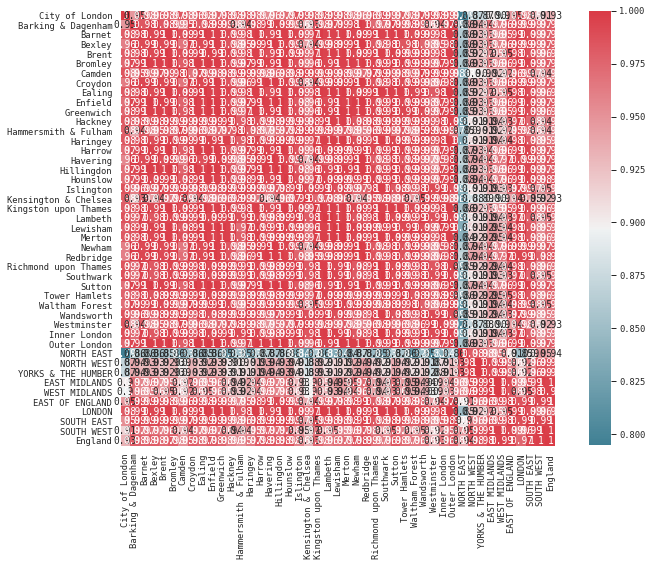

In [9]:
#heatmap using seaborn
sns.set(context="paper", font="monospace")
housing_corr_matrix = housing.corr()

fig,axe = plt.subplots(figsize=(12,8))

cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)

sns.heatmap(housing_corr_matrix,vmax = 1, square = True, cmap=cmap, annot=True)

Find Outliers

In [10]:
def Outliers(dataset):
    for i in range(2, len(housing.columns)):
        data = dataset[dataset.columns[i]].describe()
        Q1 = data[4]
        Q3 = data[6]
        Inter_Quartile_Range = Q3 - Q1
        Lower_Bound = Q1 - (1.5*Inter_Quartile_Range)
        Upper_Bound = Q3 + (1.5*Inter_Quartile_Range)
        
        for j in range(0,len(housing.index)):
            if dataset[dataset.columns[i]][j] < Lower_Bound or dataset[dataset.columns[i]][j] > Upper_Bound:
                dataset[dataset.columns[i]][j] = np.nan
            #if [j < Lower_Bound or j > Upper_Bound] = np.nan
                dataset = dataset.dropna(axis = 0)
            else:
                continue
    print(dataset.isnull().sum())
    return(dataset)

In [11]:
def Z_ScoreOutliers(dataset):
    for i in range (0,len):
        mean = dataset[dataset.columns[i]].describe()[1]
        std = dataset[dataset.columns[i]].describe()[2]
        for j in range (0,326):
            z = (dataset[dataset.columns[i]][j] - mean)/ std
            if abs(z) > 3:
                dataset[dataset.columns[i]][j] = np.nan
            else:
                continue
    print(dataset.isnull().sum())
    return(dataset)

In [12]:
Outliers(housing)

City of London          0
Barking & Dagenham      0
Barnet                  0
Bexley                  0
Brent                   0
Bromley                 0
Camden                  0
Croydon                 0
Ealing                  0
Enfield                 0
Greenwich               0
Hackney                 0
Hammersmith & Fulham    0
Haringey                0
Harrow                  0
Havering                0
Hillingdon              0
Hounslow                0
Islington               0
Kensington & Chelsea    0
Kingston upon Thames    0
Lambeth                 0
Lewisham                0
Merton                  0
Newham                  0
Redbridge               0
Richmond upon Thames    0
Southwark               0
Sutton                  0
Tower Hamlets           0
Waltham Forest          0
Wandsworth              0
Westminster             0
Inner London            0
Outer London            0
NORTH EAST              0
NORTH WEST              0
YORKS & THE HUMBER      0
EAST MIDLAND

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
1995-01-01,91448.98487,50460.22660,93284.51832,64958.09036,71306.56698,81671.47692,120932.88810,69158.16225,79885.89069,72514.69096,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.59610,74435.76052,64018.87894,54705.15790,53202.77128
1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.86220,68951.09542,80897.06551,73155.19746,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.15490
1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.21310,68712.44341,81379.86288,72190.44144,...,42369.72984,44434.86810,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.28430
1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.89900,68610.04641,82188.90498,71442.92235,...,42095.84360,44267.77960,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.85480
1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.27820,68844.91690,82077.05525,70630.77955,...,43266.45165,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,53678.24041
1995-06-01,94900.51244,53700.34831,90107.23471,64252.32335,74310.48167,82382.83435,121887.46250,69052.51103,81630.66181,71348.31147,...,42315.34372,44112.96432,45392.63981,45679.99539,50100.43023,56288.94557,75606.24501,65511.00800,54420.15939,53735.15475
1995-07-01,110128.04230,52113.12157,91441.24768,63722.70055,74127.03788,82898.52264,124027.57680,69142.48112,82352.22260,71837.54011,...,43287.74323,44109.58764,45534.99864,46037.67312,49860.00809,57242.30186,75984.24079,65224.88465,54265.86368,53900.60633
1995-08-01,112329.43760,52232.19868,92361.31512,64432.60005,73547.04110,82054.37156,125529.80390,68993.42545,82706.65927,72237.94562,...,41899.05494,44193.66583,45111.45939,45922.53585,49598.45969,56732.40547,75529.34488,64851.60429,54365.71495,53600.31975
1995-09-01,104473.10960,51471.61353,93273.12245,64509.54767,73789.54287,81440.43008,120596.85110,69393.50023,82011.08271,71725.22104,...,41850.85646,44088.07696,44837.86023,45771.66321,49319.69715,56259.28635,74940.80872,64352.47119,54243.98694,53309.23310
1995-10-01,108038.11810,51513.75760,92567.38498,64529.93725,73264.05385,81862.16087,117458.49220,68934.61234,80522.66054,72349.13744,...,41688.16474,43109.99448,44309.99910,45154.71999,49597.93617,55240.28898,74302.08030,64125.80591,54264.60640,52844.62070


In [13]:
#Z_ScoreOutliers(housing)

<AxesSubplot:>

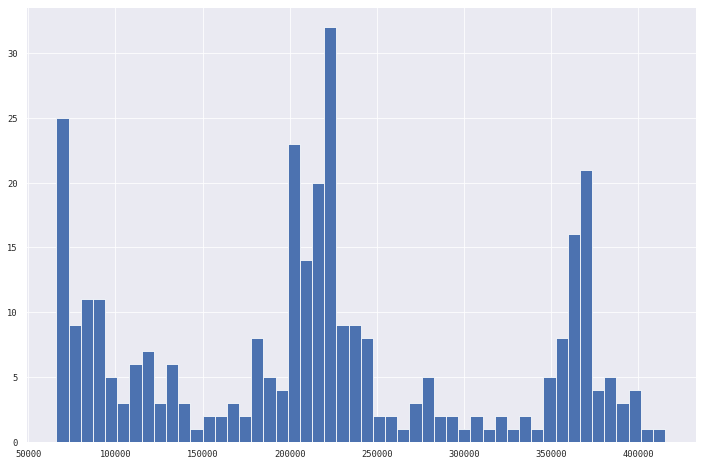

In [14]:
OutlierFill = housing[housing["Havering"].notnull()]["Havering"]
OutlierFill.hist(figsize=(12,8), bins=50)

In [15]:
imputer = SimpleImputer(np.nan, strategy = "median")
imputer.fit(housing.iloc[:,4:5])

housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
housing.isnull().sum()

C:\Users\ishak\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass missing_values=nan as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


City of London          0
Barking & Dagenham      0
Barnet                  0
Bexley                  0
Brent                   0
Bromley                 0
Camden                  0
Croydon                 0
Ealing                  0
Enfield                 0
Greenwich               0
Hackney                 0
Hammersmith & Fulham    0
Haringey                0
Harrow                  0
Havering                0
Hillingdon              0
Hounslow                0
Islington               0
Kensington & Chelsea    0
Kingston upon Thames    0
Lambeth                 0
Lewisham                0
Merton                  0
Newham                  0
Redbridge               0
Richmond upon Thames    0
Southwark               0
Sutton                  0
Tower Hamlets           0
Waltham Forest          0
Wandsworth              0
Westminster             0
Inner London            0
Outer London            0
NORTH EAST              0
NORTH WEST              0
YORKS & THE HUMBER      0
EAST MIDLAND

Training Sets

Standardise

In [16]:
housing.iloc[:,[3, 6, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 24, 26, 27, 29, 30, 31, 32, 41]]

,Bexley,Camden,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Newham,Richmond upon Thames,Southwark,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,LONDON
1995-01-01,64958.09036,120932.88810,62300.10169,61296.52637,124902.86020,76287.56947,72231.70537,92516.48557,1.826948e+05,80875.84843,67770.98843,60491.26109,53539.31919,109326.12450,67885.20344,59865.18995,61319.44913,88559.04381,1.330253e+05,74435.76052
1995-02-01,64787.92069,119508.86220,60993.26863,63187.08332,122087.71800,78901.21036,71051.55852,94342.37334,1.823452e+05,81230.13524,65381.51908,60869.27091,53153.88306,111103.03940,64799.06480,62318.53353,60252.12246,88641.01678,1.314683e+05,72777.93709
1995-03-01,64367.49344,120282.21310,61377.83464,63593.29935,120635.94670,78521.94855,72097.99411,93465.86407,1.828788e+05,81111.48848,66336.51868,60288.03002,53458.26393,107325.47420,65763.29719,63938.67686,60871.08493,87124.81523,1.322603e+05,73896.84204
1995-04-01,64277.66881,120097.89900,61927.72460,65139.64403,121424.62410,79545.57477,71890.28339,93344.49305,1.841769e+05,81672.80476,66388.77160,59471.03136,54479.75395,106875.00000,63073.62117,66233.19383,60971.39722,87026.00225,1.333702e+05,74455.28754
1995-05-01,63997.13588,119929.27820,63512.99103,66193.99212,124433.53900,79374.03490,72877.47219,94346.39917,1.914741e+05,82123.51084,69035.11076,58551.38387,55803.95958,107707.67990,64420.49933,66432.85846,61494.16938,86518.05945,1.339111e+05,75432.02786
1995-06-01,64252.32335,121887.46250,64751.56404,66921.17101,126175.15130,79956.36210,72331.08116,97428.94311,1.972658e+05,82205.66822,68881.15764,58041.43543,56067.76986,112865.05420,64155.81449,66232.16372,61547.79643,88114.33510,1.345622e+05,75606.24501
1995-07-01,63722.70055,124027.57680,65486.34112,68390.75300,124381.51340,80746.34881,73717.78844,98976.14077,1.979633e+05,82525.79300,69608.72242,58126.37811,55458.31693,114656.60110,67024.74767,64692.22672,61933.52738,89830.58934,1.334502e+05,75984.24079
1995-08-01,64432.60005,125529.80390,65076.43195,68096.79385,123625.31960,81217.69074,74479.94802,98951.20791,1.980374e+05,83342.84552,68840.02827,58151.31540,54709.35467,112320.40960,65525.94434,63472.27558,61916.42220,90560.68078,1.365815e+05,75529.34488
1995-09-01,64509.54767,120596.85110,63996.81525,68752.50284,123094.04840,82142.89052,74426.66090,99582.63778,1.970478e+05,85110.96835,70155.81997,58742.99034,54585.50364,110424.57030,63467.00948,62177.59435,61548.15206,91373.69840,1.359931e+05,74940.80872
1995-10-01,64529.93725,117458.49220,63405.26599,67619.65052,123442.56000,81791.48237,73643.14027,97580.38673,2.000058e+05,85726.97473,69616.18689,58073.14016,54789.55504,108406.70060,60885.98483,62066.45135,60572.57036,90246.40944,1.345134e+05,74302.08030


In [17]:
Target_Variables = housing.iloc[:,[3,6, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 24, 26, 27, 29, 30, 31, 32, 41]]
#housingind = housing.drop("Bexley", "Camden", "Greenwich", "Hackney", "Hammersmith & Fulham", "Haringey", "Hounslow", "Islington", "Kensington & Chelsea", "Kingston upon Thames", "Lambeth", "Lewisham", "Newham", "Richmon upon Thames", "Southwark", "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster", "LONDON", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(housing, Target_Variables, test_size=0.2, random_state =42, shuffle = False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(260, 45)
(66, 45)
(260, 20)
(66, 20)


In [18]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

Linear Regression Model

In [19]:
Linear_Regression = LinearRegression(n_jobs = -1) # set all cores available for this task

Linear_Regression.fit(X_train, y_train)

Linear_Regression.intercept_.shape #y-intercept
Linear_Regression.coef_.shape #regression coefficient

(20, 45)

In [20]:
y_pred = Linear_Regression.predict(X_test)
#print(y_pred)
print(y_pred.shape)
Prediction = pd.DataFrame(y_pred, columns = y_test.columns)
#print(Prediction)
#print(X_test)
Test = pd.DataFrame(y_test)
print(Test.shape)
test = pd.DataFrame({'Predicted':[Prediction],'True':[Test]}, index=[0])

(66, 20)
(66, 20)


In [21]:
np.savetxt("Test.csv", Test, delimiter=",")
np.savetxt("PredictionsLinear.csv", Prediction, delimiter=",")
#print(len(Pred.columns))
Prediction.shape

(66, 20)

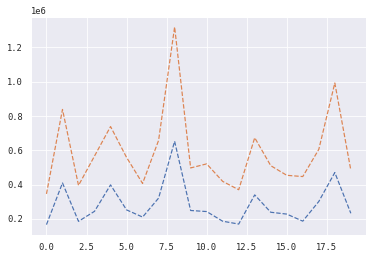

In [22]:
Pred = pd.read_csv("PredictionsLinear.csv",header=None)
Test = pd.read_csv("Test.csv",header=None)
predavg = []
testavg = []
for i in range(0, len(Pred.columns)):
    predavg.append(sum(list(Pred[i]))/len(Pred[i]))
    testavg.append(sum(list(Test[i]))/len(Test[i]))
b = range(0, len(predavg))
plt.plot(b, predavg, '--', label = y_test.columns[i])
plt.plot(b, testavg, '--', label = y_test.columns[i])
plt.show()

RMSE

In [23]:
print(np.sqrt(metrics.mean_squared_error(y_test, Prediction.iloc[0:66])))
print(np.sqrt(metrics.mean_squared_error(y_train, Linear_Regression.predict(X_train))))

350791.52089144284
2.350084707932181e-10


In [24]:
metrics.r2_score(y_test, Prediction.iloc[0:len(y_test)])

-271.3607159284561

Decision Tree Regression

In [25]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [26]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred.shape

(66, 20)

In [27]:
np.savetxt("PredictionsDecision.csv", dtReg_y_pred, delimiter=",")

In [28]:
housing = pd.read_csv("PredictionsDecision.csv", index_col=0, parse_dates=True)
housing.head

<bound method NDFrame.head of                           3.397170083999999915e+05  1.817469122999999963e+05  \
1.730044679999999935e+05                                                       
134080.72120                          319465.57690               145616.3352   
134080.72120                          319465.57690               145616.3352   
183343.66380                          434898.14600               200256.2561   
201283.71950                          480597.79980               221962.2178   
197737.18770                          454547.23480               221333.1360   
199919.36360                          490244.36400               225583.1816   
209984.32410                          685330.09860               251706.3612   
199919.36360                          490244.36400               225583.1816   
199919.36360                          490244.36400               225583.1816   
194016.75240                          406025.00460               212312.1164   
189826.517

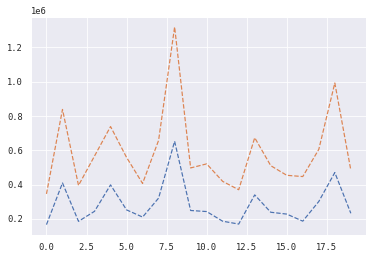

In [29]:
PredD = pd.read_csv("PredictionsDecision.csv",header=None)
TestD = pd.read_csv("Test.csv",header=None)
predavgD = []
testavgD = []
for i in range(0, len(Pred.columns)):
    predavgD.append(sum(list(PredD[i]))/len(PredD[i]))
    testavgD.append(sum(list(TestD[i]))/len(TestD[i]))
b = range(0, len(predavgD))
plt.plot(b, predavg, '--', label = y_test.columns[i])
plt.plot(b, testavg, '--', label = y_test.columns[i])
plt.show()

In [30]:
print(np.sqrt(metrics.mean_squared_error(y_test, dtReg_y_pred)))#had y_test before

326544.370554545


In [31]:
y_predD = pd.DataFrame(dtReg_y_pred, index = None)
metrics.r2_score(y_test, dtReg_y_pred)#had y_test before

-234.2921734953883

Random Forest Regression

In [32]:
Random_Forest_Regression = RandomForestRegressor(30)
Random_Forest_Regression.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [33]:
Random_Forest_Regression_y_pred = Random_Forest_Regression.predict(X_test)

In [34]:
print(Random_Forest_Regression_y_pred.shape)
print(y_test.shape)
print(Random_Forest_Regression_y_pred)

(66, 20)
(66, 20)
[[117942.47034467 270316.98032667 125855.48114233 ... 202585.47515667
  297323.10472333 159197.20795467]
 [104062.565366   237438.53794333 110267.04603933 ... 178588.06038
  261106.56096    140266.665041  ]
 [122479.09234467 282020.55217667 131374.30373833 ... 212089.32459333
  308207.25294333 166079.998759  ]
 ...
 [272047.03579667 757662.71999333 325834.62898667 ... 556092.67681
  928834.21154333 414607.76776333]
 [264726.00459667 717910.00392667 315098.85713333 ... 533328.79595333
  891407.54379333 400045.12293   ]
 [277712.88989333 749581.35666333 329619.61994667 ... 556617.18468333
  927847.31472667 417654.97986   ]]


In [35]:
print(np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Regression_y_pred)))

325831.50162142346


In [36]:
np.savetxt("PredictionsForest.csv", Random_Forest_Regression_y_pred, delimiter=",")

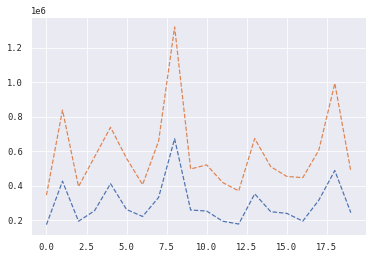

In [37]:
PredF = pd.read_csv("PredictionsForest.csv",header=None)
TestF = pd.read_csv("Test.csv",header=None)
predavgF = []
testavgF = []
for i in range(0, len(Pred.columns)):
    predavgF.append(sum(list(PredF[i]))/len(PredF[i]))
    testavgF.append(sum(list(TestF[i]))/len(TestF[i]))
b = range(0, len(predavgF))
plt.plot(b, predavgF, '--', label = y_test.columns[i])
plt.plot(b, testavgF, '--', label = y_test.columns[i])
plt.show()

In [38]:
metrics.r2_score(y_test, Random_Forest_Regression_y_pred)

-231.43824493963984

In [39]:
print(260/12)

21.666666666666668


In [40]:
Lin = [{'RMSE':np.sqrt(metrics.mean_squared_error(y_test, Prediction.iloc[0:len(y_test)])), 'r2':metrics.r2_score(y_test, Prediction.iloc[0:len(y_test)]),'type': 'Linear'}]
For = [{'RMSE':np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Regression_y_pred)), 'r2':metrics.r2_score(y_test, Random_Forest_Regression_y_pred),'type': 'Random Forest'}]
Dec = [{'RMSE':np.sqrt(metrics.mean_squared_error(y_test, dtReg_y_pred)),'r2':metrics.r2_score(y_test, dtReg_y_pred),'type': 'Decision Tree'}]
EvalLin = pd.DataFrame(Lin)
EvalFor = pd.DataFrame(For)
EvalDec = pd.DataFrame(Dec)
Evaluation = pd.concat([EvalLin, EvalFor, EvalDec]).reset_index(drop=True)
#Evaluation = Evaluation.drop(axis=1)

            RMSE          r2           type
0  350791.520891 -271.360716         Linear
1  325831.501621 -231.438245  Random Forest
2  326544.370555 -234.292173  Decision Tree


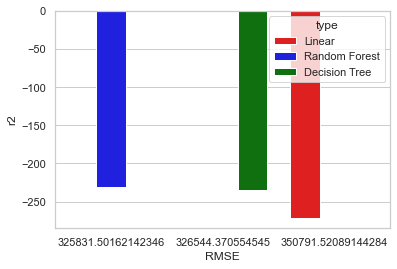

In [41]:
sns.set_theme(style="whitegrid")
BarChart = sns.barplot(x="RMSE", y="r2", data=Evaluation, hue = 'type', palette = ['red', 'blue', 'green'])
print(Evaluation)